<a href="https://colab.research.google.com/github/Ramjeet-Dixit/IITM-AIML-Rdixit/blob/main/Regularization_in_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title: Regularization in Regression - Polynomial Model with Ridge and Lasso
## Dataset: housingdata.csv
----

### Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Step 2: Load Dataset



In [2]:
# Make sure 'housingdata.csv' is in your working directory
df = pd.read_csv('/Users/ramjeetdixit/Downloads/housingdata.csv')

df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,HOUSEPRICE
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [4]:

df.shape

(506, 12)

### Step 3: Problem Statement

#### Goal: Predict 'HOUSEPRICE' based on one or more input features.
#### Assume data has non-linearity; hence we'll use polynomial regression.

In [5]:
# For simplicity, we'll use a single feature (e.g., 'Area') for visualization
X = df.drop(columns=['HOUSEPRICE'])  # Independent variable
y = df['HOUSEPRICE']   # Target variable

### Step 4: Train-Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 5: Polynomial Regression Model (No Regularization)

In [7]:
poly_degree = 2
poly_model = make_pipeline(PolynomialFeatures(degree=poly_degree), Ridge(alpha=0))  # Ridge with alpha=0 behaves like no regularization
poly_model.fit(X_train, y_train)
y_pred_train = poly_model.predict(X_train)
y_pred = poly_model.predict(X_test)

print("Polynomial Regression (No Regularization):")
print("R² Score Train:", r2_score(y_train, y_pred_train))
print("R² Score Test:", r2_score(y_test, y_pred))
print("RMSE Train:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("RMSE Test:", np.sqrt(mean_squared_error(y_test, y_pred)))

Polynomial Regression (No Regularization):
R² Score Train: 0.915832092022225
R² Score Test: 0.8042205803600357
RMSE Train: 2.704062251415165
RMSE Test: 3.7890956054355525


### Step 6: Ridge Regression

In [8]:
ridge_model = make_pipeline(PolynomialFeatures(degree=poly_degree), Ridge(alpha=1000))
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
y_pred_train = ridge_model.predict(X_train)
y_pred = ridge_model.predict(X_test)
print("Polynomial Regression (Ridge Regularization):")
print("R² Score Train:", r2_score(y_train, y_pred_train))
print("R² Score Test:", r2_score(y_test, y_pred))
print("RMSE Train:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("RMSE Test:", np.sqrt(mean_squared_error(y_test, y_pred)))

Polynomial Regression (Ridge Regularization):
R² Score Train: 0.8934817997027835
R² Score Test: 0.8380987357103817
RMSE Train: 3.0419728187444326
RMSE Test: 3.4456976374599386


### Step 7: Lasso Regression

In [9]:
lasso_model = make_pipeline(PolynomialFeatures(degree=poly_degree), Lasso(alpha=10, max_iter=10000))
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)
y_pred_train = lasso_model.predict(X_train)
y_pred = lasso_model.predict(X_test)
print("Polynomial Regression (Ridge Regularization):")
print("R² Score Train:", r2_score(y_train, y_pred_train))
print("R² Score Test:", r2_score(y_test, y_pred))
print("RMSE Train:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("RMSE Test:", np.sqrt(mean_squared_error(y_test, y_pred)))

Polynomial Regression (Ridge Regularization):
R² Score Train: 0.795654141609424
R² Score Test: 0.7911168772641535
RMSE Train: 4.213338376816757
RMSE Test: 3.9138458871756425


### Actual vs Predicted Visualization

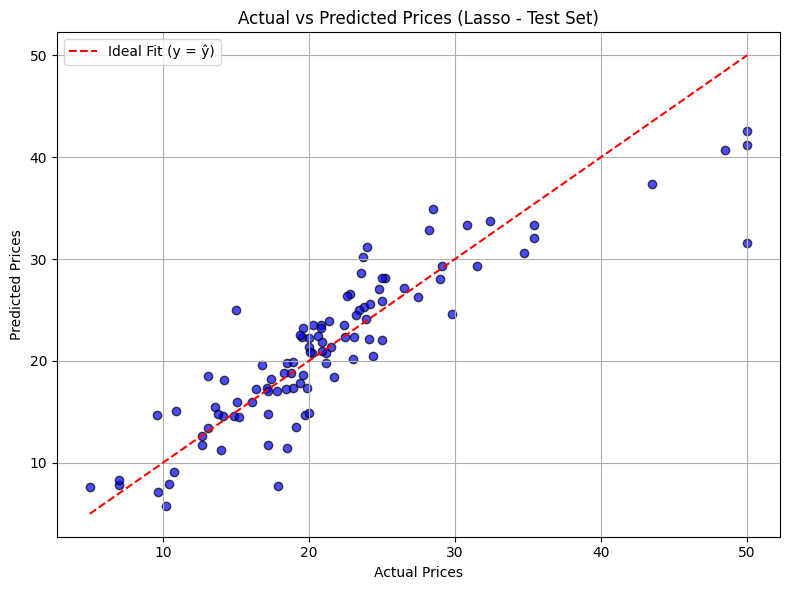

In [ ]:
# Generate Actual vs Predicted plot for Test Set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', label='Ideal Fit (y = ŷ)')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Lasso - Test Set)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Actual Vs Predicted.png")